In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [3]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv('test.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
y=df['label'].values
X=df.drop(columns=['label'])
X.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X=np.array(X)
X_test=np.array(df_test)
print('train shape:'+str(X.shape)+'test.shape'+str(X_test.shape))

train shape:(42000, 784)test.shape(28000, 784)


In [7]:
X=np.reshape(X,(42000,28,28))
X_test=np.reshape(X_test,(28000,28,28))
X.shape

(42000, 28, 28)

In [8]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=.4)

In [9]:
print('x_train:' +str(x_train.shape)+' and x_cv:'+str(x_cv.shape))

x_train:(25200, 28, 28) and x_cv:(16800, 28, 28)


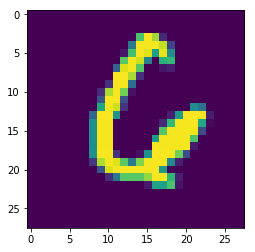

In [10]:
plt.imshow(x_train[5])
plt.show()

In [11]:
##logistic regg
x_trainl=x_train.reshape(x_train.shape[0],-1)
x_cvl=x_cv.reshape(x_cv.shape[0],-1)
x_testl=X_test.reshape(X_test.shape[0],-1)
print('x_trainl:' +str(x_trainl.shape)+' and x_cvl:'+str(x_cvl.shape))

x_trainl:(25200, 784) and x_cvl:(16800, 784)


In [12]:
lg=LogisticRegression(multi_class='multinomial',solver='lbfgs')##newton-cg,sag
lg=lg.fit(x_trainl,y_train)

In [13]:
y_predl=lg.predict(x_cvl)
y_predl

array([8, 4, 1, ..., 6, 3, 0], dtype=int64)

In [14]:
alg=accuracy_score(y_cv,y_predl)
print('logistic reg accuracy :'+str(alg))

logistic reg accuracy :0.9085119047619048


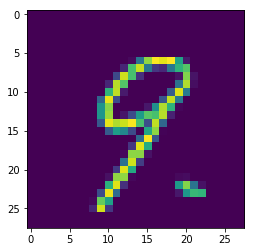

[2 0 9 ... 3 9 2]


In [15]:
y_predl2=lg.predict(x_testl)
plt.imshow(X_test[2])
plt.show()
print(y_predl2)

In [16]:
y_pred=np.matrix(y_predl2).T



In [23]:
df=pd.DataFrame(y_pred)
df.columns=['Label']
df.head()

,Label
0,2
1,0
2,9
3,7
4,2


In [47]:
##use neural_network in sklearn ##working on not work well
clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,8),random_state=2)
nn=clf.fit(x_trainl,y_train)

In [48]:
y_prnn=nn.predict(x_cvl)
y_prnn

array([1, 1, 9, ..., 1, 9, 1], dtype=int64)

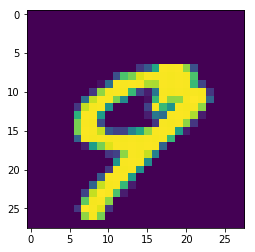

In [46]:
plt.imshow(x_cv[2])
plt.show()

In [ ]:
##neural neywrok multiclass
##save and get your marks in kaggle